In [1]:
import cv2
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means

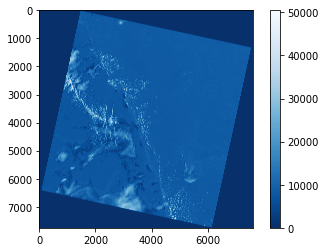

In [2]:
with rasterio.open("LC09_L2SP_146050_20250303_20250304_02_T1_SR_B2.TIF") as src:
    gray_image = src.read(1) 

plt.imshow(gray_image, cmap='Blues_r')
plt.colorbar()
plt.show()

In [3]:
with rasterio.open("LC09_L2SP_146050_20250303_20250304_02_T1_SR_B2.TIF") as src:
    resolution = src.res 
    print(f"Resolution: {resolution[0]} x {resolution[1]} meters")


Resolution: 30.0 x 30.0 meters


In [4]:
with rasterio.open("LC09_L2SP_146050_20250303_20250304_02_T1_SR_B2.TIF") as src:  
    print(f"Data Type: {src.dtypes[0]}") 

Data Type: uint16


#### Gaussian noise method1

Text(0.5, 1.0, 'Gaussian Deblurred')

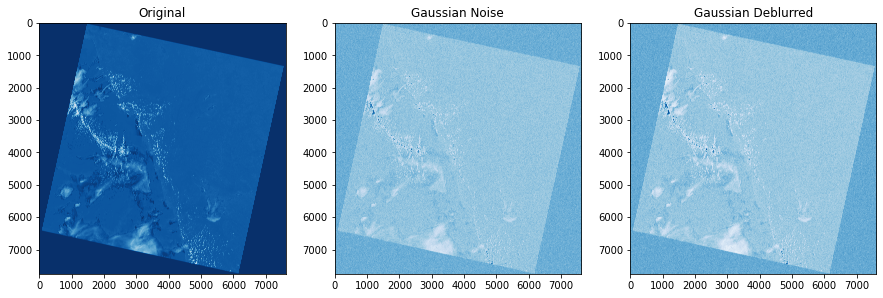

In [5]:
noise = np.zeros_like(gray_image, dtype=np.int16)
cv2.randn(noise, 0, 32768)  
noisy_image = cv2.add(gray_image.astype(np.int16), noise) 

gaussian_deblurred = cv2.GaussianBlur(noisy_image, (15,15), 0)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(gray_image, cmap='Blues_r'); axes[0].set_title("Original")
axes[1].imshow(noisy_image, cmap='Blues_r'); axes[1].set_title("Gaussian Noise")
axes[2].imshow(gaussian_deblurred, cmap='Blues_r'); axes[2].set_title("Gaussian Deblurred")

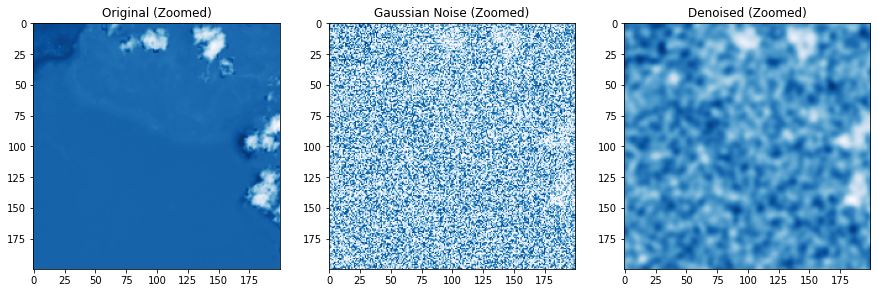

In [6]:
row_start, row_end = 2100, 2300  
col_start, col_end = 2200, 2400
gray_zoomed = gray_image[row_start:row_end, col_start:col_end]
noisy_zoomed = noisy_image[row_start:row_end, col_start:col_end]
deblurred_zoomed = gaussian_deblurred[row_start:row_end, col_start:col_end]

# Display the zoomed-in images
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(gray_zoomed, cmap='Blues_r')
axes[0].set_title("Original (Zoomed)")
axes[1].imshow(noisy_zoomed, cmap='Blues_r')
axes[1].set_title("Gaussian Noise (Zoomed)")
axes[2].imshow(deblurred_zoomed, cmap='Blues_r')
axes[2].set_title("Denoised (Zoomed)")
plt.show()


#### Gaussian noise method2

Text(0.5, 1.0, 'denoised_image')

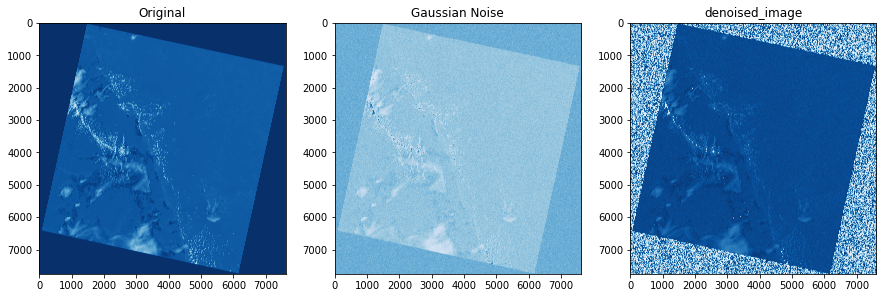

In [7]:
noisy_image_float = noisy_image.astype(np.float32) / 65535.0
denoised_image_float = denoise_nl_means(noisy_image_float, patch_size=5, patch_distance=11, h=0.8)
denoised_image_uint16 = (denoised_image_float * 65535).astype(np.uint16)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(gray_image, cmap='Blues_r'); axes[0].set_title("Original")
axes[1].imshow(noisy_image, cmap='Blues_r'); axes[1].set_title("Gaussian Noise")
axes[2].imshow(denoised_image_uint16, cmap='Blues_r'); axes[2].set_title("denoised_image")

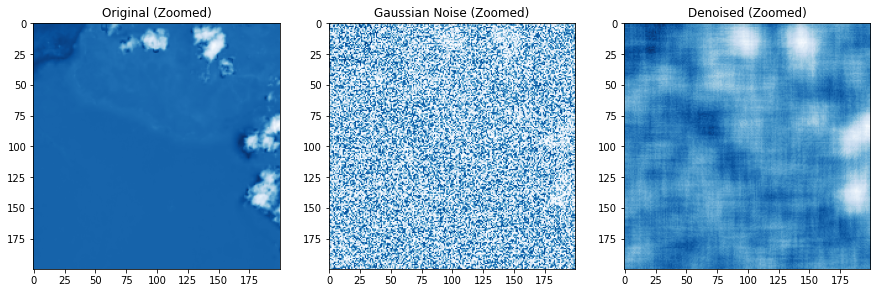

In [ ]:
row_start, row_end = 2100, 2300 
col_start, col_end = 2200, 2400

gray_zoomed = gray_image[row_start:row_end, col_start:col_end]
in_img_zoomed = noisy_image[row_start:row_end, col_start:col_end]
blurred_zoomed = denoised_image_uint16[row_start:row_end, col_start:col_end]

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(gray_zoomed, cmap='Blues_r')
axes[0].set_title("Original (Zoomed)")
axes[1].imshow(in_img_zoomed, cmap='Blues_r')
axes[1].set_title("Gaussian Noise (Zoomed)")
axes[2].imshow(blurred_zoomed, cmap='Blues_r')
axes[2].set_title("Denoised (Zoomed)")
plt.show()


In [9]:
def psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(65535.0 / np.sqrt(mse))  

In [13]:
print("Method 1: " , psnr(gray_image,gaussian_deblurred))
print("Method 2:" ,psnr(gray_image,denoised_image_uint16))

Method 1:  26.40928571671052
Method 2: 51.3559499257416


#### Salt and Pepper Noise

In [14]:
imp_noise = np.zeros(gray_image.shape, np.uint16)
cv2.randu(imp_noise, 0, 65535)  

# mask
salt_mask = imp_noise > 60000  
pepper_mask = imp_noise < 5000  

imp_noise[:] = 0  
imp_noise[salt_mask] = 65535  # White 
imp_noise[pepper_mask] = 0  # Black

in_img = gray_image.copy()
in_img[salt_mask] = 65535
in_img[pepper_mask] = 0

Text(0.5, 1.0, 'median_deblurred_image')

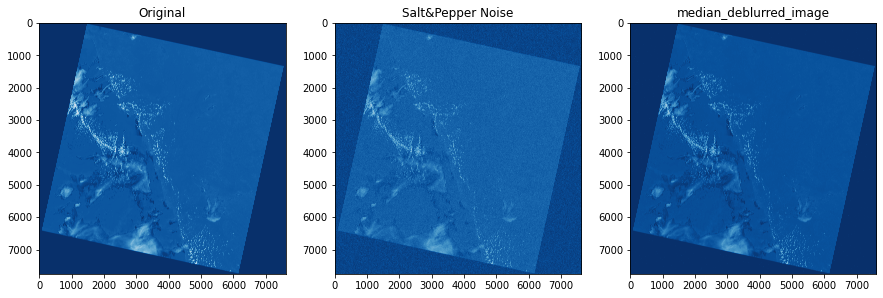

In [16]:
median_deblurred=cv2.medianBlur(in_img, 3)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(gray_image, cmap='Blues_r'); axes[0].set_title("Original")
axes[1].imshow(in_img, cmap='Blues_r'); axes[1].set_title("Salt&Pepper Noise")
axes[2].imshow(median_deblurred, cmap='Blues_r'); axes[2].set_title("median_deblurred_image")

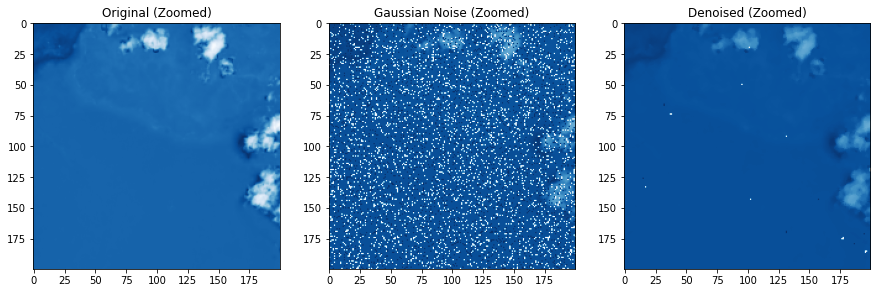

In [17]:
row_start, row_end = 2100, 2300 
col_start, col_end = 2200, 2400

gray_zoomed = gray_image[row_start:row_end, col_start:col_end]
in_img_zoomed = in_img[row_start:row_end, col_start:col_end]
blurred_zoomed = median_deblurred[row_start:row_end, col_start:col_end]

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(gray_zoomed, cmap='Blues_r')
axes[0].set_title("Original (Zoomed)")
axes[1].imshow(in_img_zoomed, cmap='Blues_r')
axes[1].set_title("Gaussian Noise (Zoomed)")
axes[2].imshow(blurred_zoomed, cmap='Blues_r')
axes[2].set_title("Denoised (Zoomed)")
plt.show()